## Ejercicio hiperparametrización breast cancer de sklearn

1. Carga el dataset [breast_cancer de `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
2. Prueba al menos 5 modelos diferentes de clasificación y aplica un GridSearchCV mediante Pipelines. Aplica también un RandomizedSearchCV.
3. Conclusiones. Guarda el modelo final en un archivo con pickle.

In [13]:
# Librerías de análisis y visualización
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Librerías de sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Guardado de modelo
import pickle

#### 1 Cargar Datos y EDA

In [14]:
# 1. Cargar dataset y EDA
data = load_breast_cancer()

# Convertir a DataFrame para exploración
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [15]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [16]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [27]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [17]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


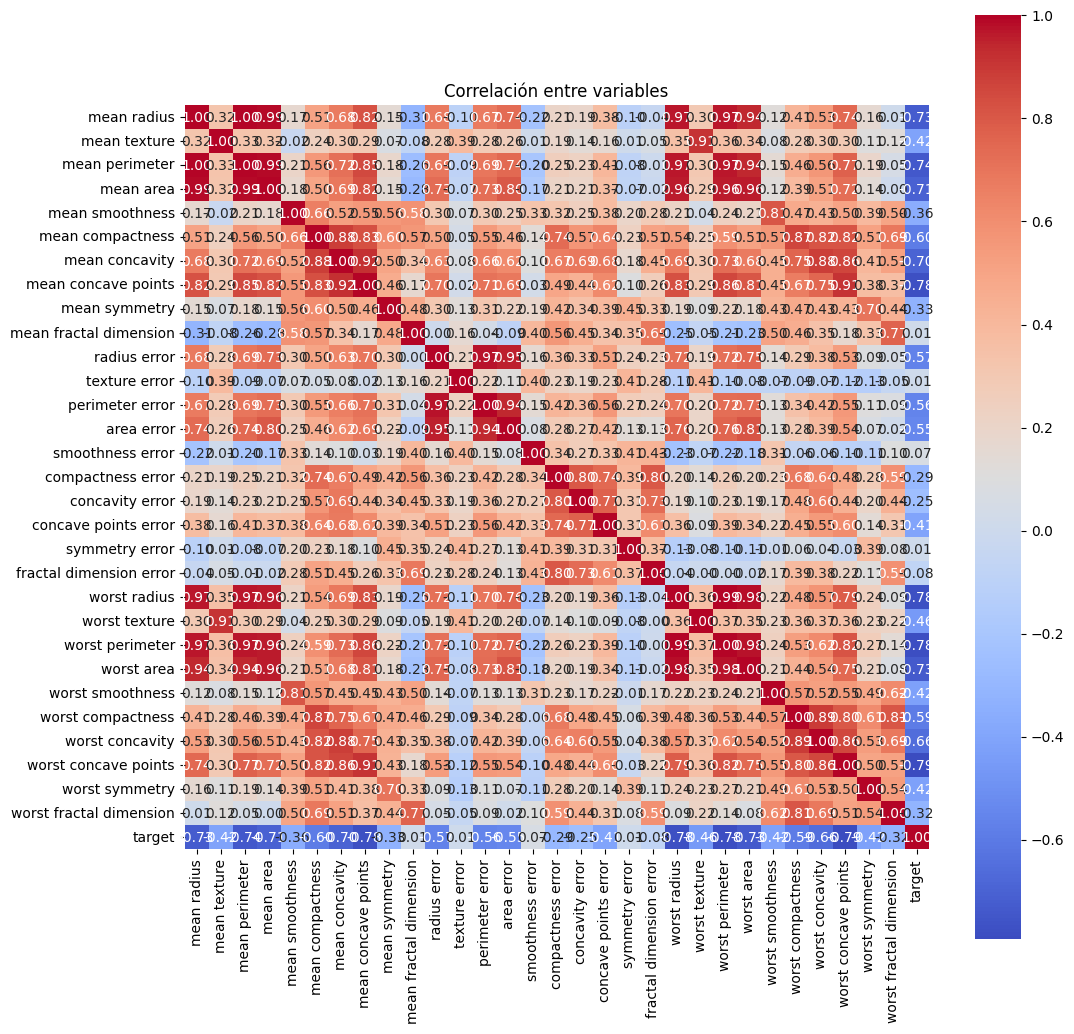

In [25]:
# Visualización de la correlación
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlación entre variables')
plt.show()

#### 2 Dividir en entrenamiento y prueba

In [19]:
# X contiene las características (entradas) del conjunto de datos.
X = data.data

# y contiene las etiquetas (salidas) o valores a predecir.
y = data.target

# 'stratify=y' para mantener las proporciones de las clases en ambas partes.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#### 3 Modelos y búsqueda de hiperparámetros

In [20]:
# Diccionario que contiene modelos y sus respectivos hiperparámetros para realizar búsqueda de hiperparámetros
models = {
    # Regresión logística
    'log_reg': (LogisticRegression(max_iter=10000, random_state=42), {
        'clf__C': [0.01, 0.1, 1, 10, 100]  # Valores para el parámetro de regularización
    }),
    
    # SVM
    'svm': (SVC(), {
        'clf__C': [0.1, 1, 10],  # Valores para el parámetro de regularización
        'clf__kernel': ['linear', 'rbf']  # Tipos de núcleo para el SVM
    }),
    
    # Bosque aleatorio (Random Forest)
    'rf': (RandomForestClassifier(random_state=42), {
        'clf__n_estimators': [50, 100, 200],  # Número de árboles en el bosque
        'clf__max_depth': [None, 5, 10]  # Profundidad máxima de los árboles
    }),
    
    # Gradiente boosting
    'gb': (GradientBoostingClassifier(random_state=42), {
        'clf__n_estimators': [100, 200],  # Número de árboles en el modelo
        'clf__learning_rate': [0.01, 0.1, 0.2]  # Tasa de aprendizaje
    }),
    
    # K vecinos más cercanos (KNN)
    'knn': (KNeighborsClassifier(), {
        'clf__n_neighbors': [3, 5, 7],  # Número de vecinos a considerar
        'clf__weights': ['uniform', 'distance']  # Cómo ponderar los vecinos
    })
}


### 4. GridSearchCV para todos los modelos

In [21]:
# Diccionario para guardar los mejores modelos encontrados
best_models = {}

# Iterar sobre los modelos y sus parámetros para realizar la búsqueda
for name, (model, params) in models.items():
    print(f"\n== GridSearchCV para: {name} ==")  # Mostrar el modelo que se está evaluando
    
    # Crear un pipeline que incluye escalado de datos y el clasificador
    pipe = Pipeline([
        ('scaler', StandardScaler()),  # Paso de escalado de características
        ('clf', model)  # Paso del clasificador
    ])
    
    # Configurar GridSearchCV para buscar los mejores hiperparámetros
    grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
    
    # Entrenar el modelo con el conjunto de entrenamiento
    grid.fit(X_train, y_train)
    
    # Guardar el mejor modelo encontrado en el diccionario 'best_models'
    best_models[name] = grid.best_estimator_
    
    # Mostrar los mejores hiperparámetros y la mejor puntuación en validación cruzada
    print("Mejores hiperparámetros:", grid.best_params_)
    print("Mejor score en validación cruzada:", grid.best_score_)



== GridSearchCV para: log_reg ==
Mejores hiperparámetros: {'clf__C': 0.1}
Mejor score en validación cruzada: 0.9802197802197803

== GridSearchCV para: svm ==
Mejores hiperparámetros: {'clf__C': 0.1, 'clf__kernel': 'linear'}
Mejor score en validación cruzada: 0.9780219780219781

== GridSearchCV para: rf ==
Mejores hiperparámetros: {'clf__max_depth': None, 'clf__n_estimators': 200}
Mejor score en validación cruzada: 0.9582417582417582

== GridSearchCV para: gb ==
Mejores hiperparámetros: {'clf__learning_rate': 0.2, 'clf__n_estimators': 200}
Mejor score en validación cruzada: 0.9670329670329672

== GridSearchCV para: knn ==
Mejores hiperparámetros: {'clf__n_neighbors': 7, 'clf__weights': 'uniform'}
Mejor score en validación cruzada: 0.9714285714285715


### 5. RandomizedSearchCV para RandomForest

In [22]:
# Imprimir mensaje indicando que se va a hacer la búsqueda aleatoria de hiperparámetros para Random Forest
print("\n== RandomizedSearchCV para Random Forest ==")

# Crear el pipeline que incluye escalado y clasificador Random Forest
rf_pipe = Pipeline([
    ('scaler', StandardScaler()),  # Escalar las características
    ('clf', RandomForestClassifier(random_state=42))  # Clasificador Random Forest
])

# Definir los hiperparámetros que se probarán en la búsqueda aleatoria
rf_params = {
    'clf__n_estimators': np.arange(50, 201, 10),  # Rango de números de árboles (50, 60, ..., 200)
    'clf__max_depth': [None, 5, 10, 15, 20],  # Profundidades de los árboles
    'clf__min_samples_split': [2, 5, 10]  # Mínimo número de muestras para dividir un nodo
}

# Configurar RandomizedSearchCV con 10 iteraciones aleatorias, validación cruzada de 5 pliegues y métrica de exactitud
random_search = RandomizedSearchCV(
    rf_pipe,  # Pipeline con escalado y modelo
    rf_params,  # Hiperparámetros a probar
    n_iter=10,  # Número de iteraciones aleatorias
    cv=5,  # Número de pliegues para validación cruzada
    scoring='accuracy',  # Métrica de evaluación
    random_state=42  # Fijar la semilla para reproducibilidad
)

# Ajustar el modelo RandomizedSearchCV con los datos de entrenamiento
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados por RandomizedSearchCV
print("Randomized mejores hiperparámetros:", random_search.best_params_)



== RandomizedSearchCV para Random Forest ==
Randomized mejores hiperparámetros: {'clf__n_estimators': np.int64(180), 'clf__min_samples_split': 2, 'clf__max_depth': 10}


### 6. Evaluar todos los modelos en test set

In [23]:
# Imprimir encabezado para la evaluación de modelos en el conjunto de prueba
print("\n== Evaluación de modelos en test set ==")

# Inicializar variables para el mejor modelo y su puntuación de accuracy
best_model = None
best_score = 0

# Iterar sobre los modelos almacenados en best_models y evaluar su rendimiento en el conjunto de prueba
for name, model in best_models.items():
    # Hacer predicciones sobre el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular el accuracy del modelo
    score = accuracy_score(y_test, y_pred)
    print(f"\nModelo: {name}, Accuracy: {score:.4f}")  # Mostrar el nombre y el accuracy del modelo
    print(classification_report(y_test, y_pred))  # Imprimir el reporte de clasificación
    
    # Si este modelo tiene un mejor rendimiento, actualizar el mejor modelo y su puntuación
    if score > best_score:
        best_score = score
        best_model = model

# Evaluar el modelo Random Forest ajustado con RandomizedSearchCV
y_pred = random_search.best_estimator_.predict(X_test)
rf_score = accuracy_score(y_test, y_pred)
print(f"\nRandomForest (RandomizedSearch) Accuracy: {rf_score:.4f}")
print(classification_report(y_test, y_pred))

# Verificar si el modelo Random Forest tiene el mejor desempeño
if rf_score > best_score:
    best_model = random_search.best_estimator_



== Evaluación de modelos en test set ==

Modelo: log_reg, Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Modelo: svm, Accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Modelo: rf, Accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96  

### 7. Guardar el mejor modelo

In [24]:
with open('mejor_modelo_breast_cancer.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("\nModelo final guardado como 'mejor_modelo_breast_cancer.pkl'")


Modelo final guardado como 'mejor_modelo_breast_cancer.pkl'


### 